In [4]:
#Styler.format()
#Style.format_index()
#Style.relabel_index()

import pandas as pd
import numpy as np 

df = pd.DataFrame({
    "strings": ["Adam", "Mike"],
    "ints": [1, 3],
    "floats": [1.123, 1000.23]
})
#type(df.style)

display(df)
s = df.style.\
format(precision=3, thousands=",", decimal='.').\
format_index(str.upper,axis=1).\
relabel_index(["列1","列2"])\

s


,strings,ints,floats
0,Adam,1,1.123
1,Mike,3,1000.230


,STRINGS,INTS,FLOATS
列1,Adam,1,1.123
列2,Mike,3,"1,000.230"


In [7]:
weather_df = pd.DataFrame(np.random.rand(50,2)*5,
                          index=pd.date_range(start="2024-01-01", periods=50),
                          columns=["Tokyo","Taipei"]
                          )
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 50 entries, 2024-01-01 to 2024-02-19
Freq: D
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Tokyo   50 non-null     float64
 1   Taipei  50 non-null     float64
dtypes: float64(2)
memory usage: 1.2 KB


In [ ]:
#因為索引是datetime的資料 可以用來做切割
# weather_df.loc['2024-01-10':'2024-01-30']
# weather_df.loc['2024-01']
# weather_df.loc['2024']

,東京,台北
2024-01-01,2.672950,0.139910
2024-01-02,2.358676,1.685802
2024-01-03,0.667719,4.897309
2024-01-04,3.020837,4.612991
2024-01-05,3.333722,0.921374
...,...,...
2024-12-27,4.024529,0.704354
2024-12-28,4.927824,3.068804
2024-12-29,0.748275,3.977263
2024-12-30,0.249342,3.245806


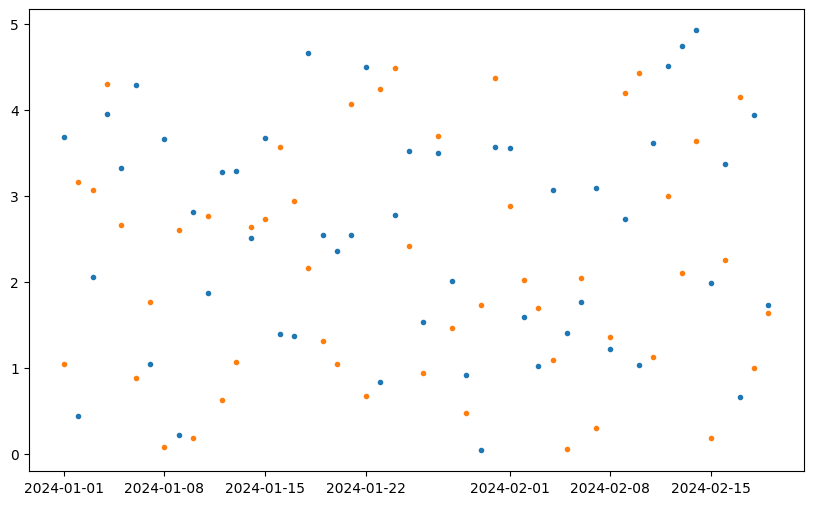

In [8]:
import matplotlib.pyplot as plt

figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
axes.plot(weather_df.index,weather_df['Tokyo'],label='Tokyyo',linestyle='',marker='.')
axes.plot(weather_df.index,weather_df['Taipei'],label='Taiepi',linestyle='',marker='.')
plt.show()
plt.close()

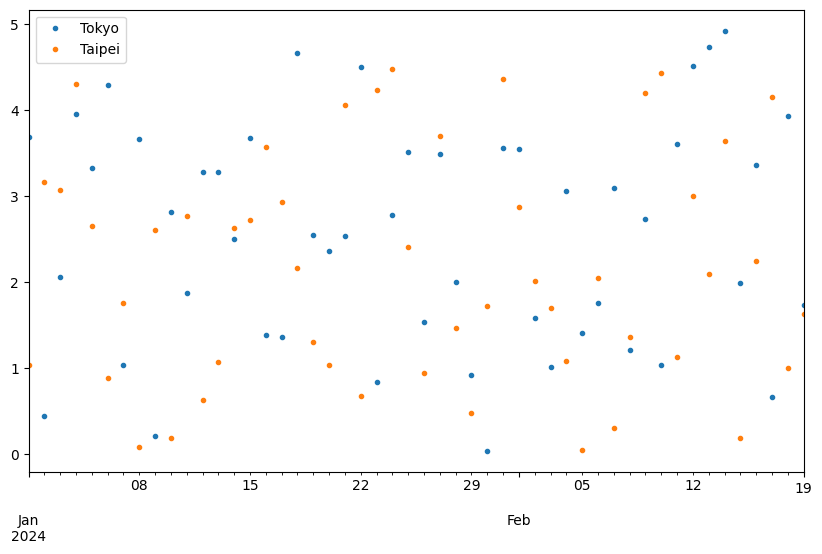

In [9]:
figure = plt.figure(figsize=(10,6))
axes = figure.add_subplot(1,1,1)
weather_df.plot(ax=axes,linestyle='',marker='.')
plt.show()
plt.close()

In [14]:
np.random.seed(5678)
weather_df = pd.DataFrame(np.random.rand(10,2)*5,
                          index=pd.date_range(start="2024-01-01", periods=10),
                          columns=["Tokyo","Taipei"]
                          )
display(weather_df)
def rain_condition(v):
    if v < 1.75:
        return "乾燥"
    elif v < 2.75:
        return "小雨"
    else:
        return "大雨"

def make_pretty(styler):
    styler.set_caption("天氣狀況")
    styler.format(rain_condition)
    styler.format_index(formatter=lambda v:v.strftime("%Y/%m/%d %A"))
    styler.background_gradient(axis=None,vmin=1,vmax=5,cmap="PuBuGn")
    return styler

s = weather_df.loc['2024-01-01':'2024-01-07'].style.pipe(make_pretty)
s.to_excel('weather_condition.xlsx')

,Tokyo,Taipei
2024-01-01,2.446635,0.296662
2024-01-02,1.831012,2.594327
2024-01-03,2.991125,2.153072
2024-01-04,0.893170,1.426269
2024-01-05,0.357193,0.923567
2024-01-06,0.439140,3.682343
2024-01-07,0.979593,3.841705
2024-01-08,3.187509,3.982030
2024-01-09,3.940964,2.084386
2024-01-10,3.943212,0.514874
